In [ ]:
import Pkg; Pkg.activate("../../"); Pkg.test()

In [26]:
using StatsBase, Statistics, Distributions, StatsPlots, LinearAlgebra
using MaGeSigGen, MaGe, MJDSigGen, DelimitedFiles, Interpolations, DSP
using Profile, ProfileSVG
using MaGe: location
using MJDSigGen: outside_detector

In [2]:
dir = realpath(joinpath(dirname(pathof(MaGeSigGen)), "..", "runs", "09-23-siggen2"))

event_dir = "/mnt/e15/comellato/results4Paul/GWD6022_Co56_side50cm/DM"
event_paths = filter(p -> occursin(r".root.hits$", p), readdir(event_dir, join=true))
signal_paths = map(
    p -> joinpath(dir, "signals", split(splitdir(p)[end], '.')[1] * "_signals.jld"),
    event_paths
)

2001-element Array{String,1}:
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0001_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0002_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0003_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0004_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0005_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0006_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0007_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0008_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0009_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen

In [3]:
const setup = MJDSigGen.signal_calc_init("GWD6022_01ns.config")


Reading values from config file GWD6022_01ns.config
Setup of signal calculation done


MJDSigGen.Struct_MJD_Siggen_Setup(0, 65.0f0, 39.0f0, 0.0f0, 7.5f0, 11.0f0, 3.0f0, 3.5f0, 0.0f0, 32.0f0, 5.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.1f0, -0.92f0, 0.031f0, 0.01f0, 0.0f0, 0.0f0, 1.0f0, 0.0f0, 3000.0f0, 30000, 1, 1, 0, (71, 87, 68, 54, 48, 50, 50, 95, 48, 49, 110, 115, 46, 99, 111, 110, 102, 105, 103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
elect_params_GWD6022 = (
    GBP = 150e+06,
    Cd  = 3.5e-12,
    tau = 65e-06,
    Cf  = 0.65e-12,
    Rf  = 2e+07,
    Kv  = 5e+05
)

(GBP = 1.5e8, Cd = 3.5e-12, tau = 6.5e-5, Cf = 6.5e-13, Rf = 2.0e7, Kv = 500000.0)

In [5]:
sgnls1 = load_signals(SignalDict, first(signal_paths))
events1 = MaGe.load(first(event_paths))
events1 = map(e->todetcoords!(e, setup), filter(e->!ismissing(sgnls1[e]), events1))

))))))))))))))))))))))))))

479-element Array{Event{Array{Hit,1}},1}:
 Event(1818, 340, 6, Hit[Hit(19.3, 29.9292, 30.1989, 0.0065, 0.0, 22, 9, 6), Hit(17.35, 31.0862, 30.9179, 0.12938, 0.0, 22, 9, 6), Hit(4.66, 37.8755, 34.8111, 0.03819, 0.0, 22, 9, 6), Hit(4.66, 37.8742, 34.8111, 3.11671, 0.0625, 11, 202, 9), Hit(4.66, 37.8717, 34.8115, 8.59944, 0.0625, 11, 202, 9), Hit(4.66, 37.8708, 34.8099, 11.68, 0.0625, 11, 202, 9), Hit(4.66, 37.8701, 34.8095, 38.7366, 0.0625, 11, 202, 9), Hit(4.66, 37.8708, 34.8099, 1.40363, 0.0625, 11, 205, 202), Hit(4.66, 37.8717, 34.8115, 1.27574, 0.0625, 11, 204, 202), Hit(4.66, 37.8742, 34.8111, 2.34378, 0.0625, 11, 203, 202)  …  Hit(19.26, 29.9165, 30.1878, 0.337472, 0.0, 11, 356, 207), Hit(19.26, 29.9165, 30.1878, 1.41627, 0.0, 11, 356, 207), Hit(19.26, 29.9164, 30.1878, 1.05488, 0.0, 11, 358, 356), Hit(19.29, 29.9262, 30.1962, 2.36125, 0.0, 11, 206, 200), Hit(19.29, 29.9263, 30.1959, 7.45506, 0.0, 11, 206, 200), Hit(19.29, 29.9263, 30.196, 2.43274, 0.0, 11, 206, 200), Hit(19.29, 29

)))))))))))))))))))))))))))))))))))))))))))))))))

In [6]:
getxaxis(series, centre) = collect(1:length(series)) .- findfirst(y -> y >= centre, series)

getxaxis (generic function with 1 method)

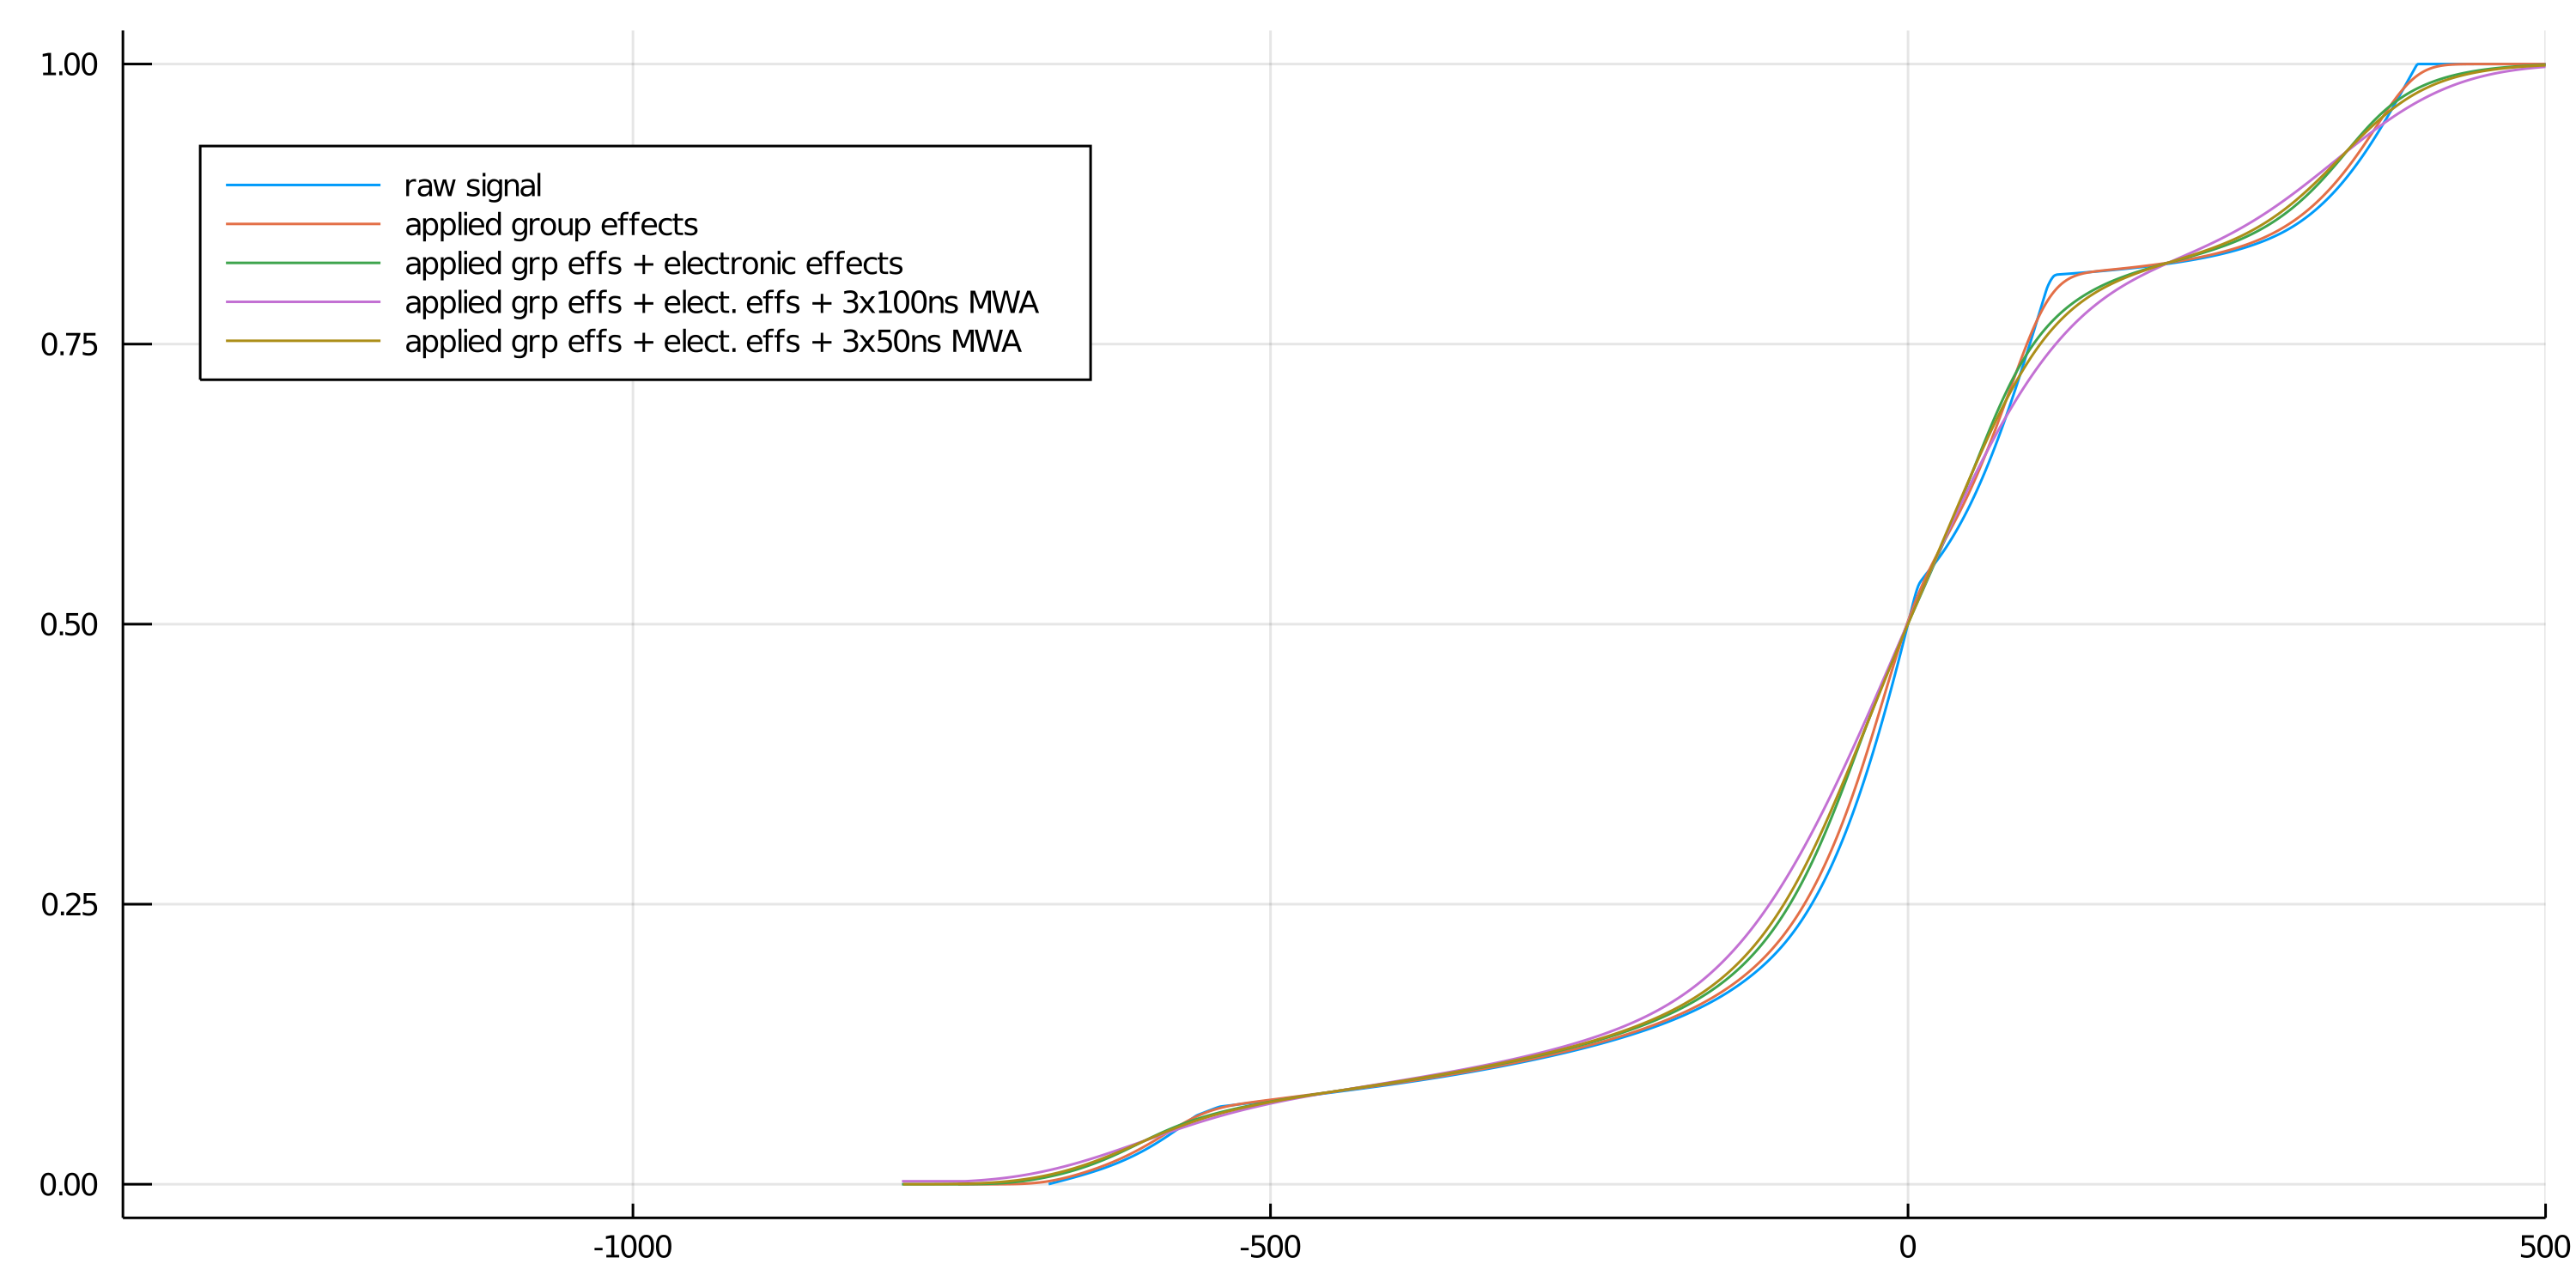

In [10]:
testevent = events1[2]
testsignal = sgnls1[testevent][1:3000]

E = energy(testevent)
δτ = with_group_effects!(setup, E, charge_cloud_size(E)) do stp
    getδτ(stp, location(first(hits(testevent))))
end

s1 = apply_group_effects(testsignal, δτ, setup.step_time_out, true)

s2 = apply_electronics(s1; elect_params_GWD6022...)

s3 = moving_average(s2, 100, 3)

s4 = moving_average(s2, 50, 3)

l0 = testsignal ./ maximum(testsignal)
l1 = s1 ./ maximum(s1)
l2 = s2 ./ maximum(s2)
l3 = s3 ./ maximum(s3)
l4 = s4 ./ maximum(s4)

plot(xlims=(-1400, 500), legend=:topleft, fmt=:png, size=(1000, 500), dpi=300)
plot!(getxaxis(l0, 0.5), l0, label="raw signal")
plot!(getxaxis(l1, 0.5), l1, label="applied group effects")
plot!(getxaxis(l2, 0.5), l2, label="applied grp effs + electronic effects")
plot!(getxaxis(l3, 0.5), l3, label="applied grp effs + elect. effs + 3x100ns MWA")
plot!(getxaxis(l4, 0.5), l4, label="applied grp effs + elect. effs + 3x50ns MWA")

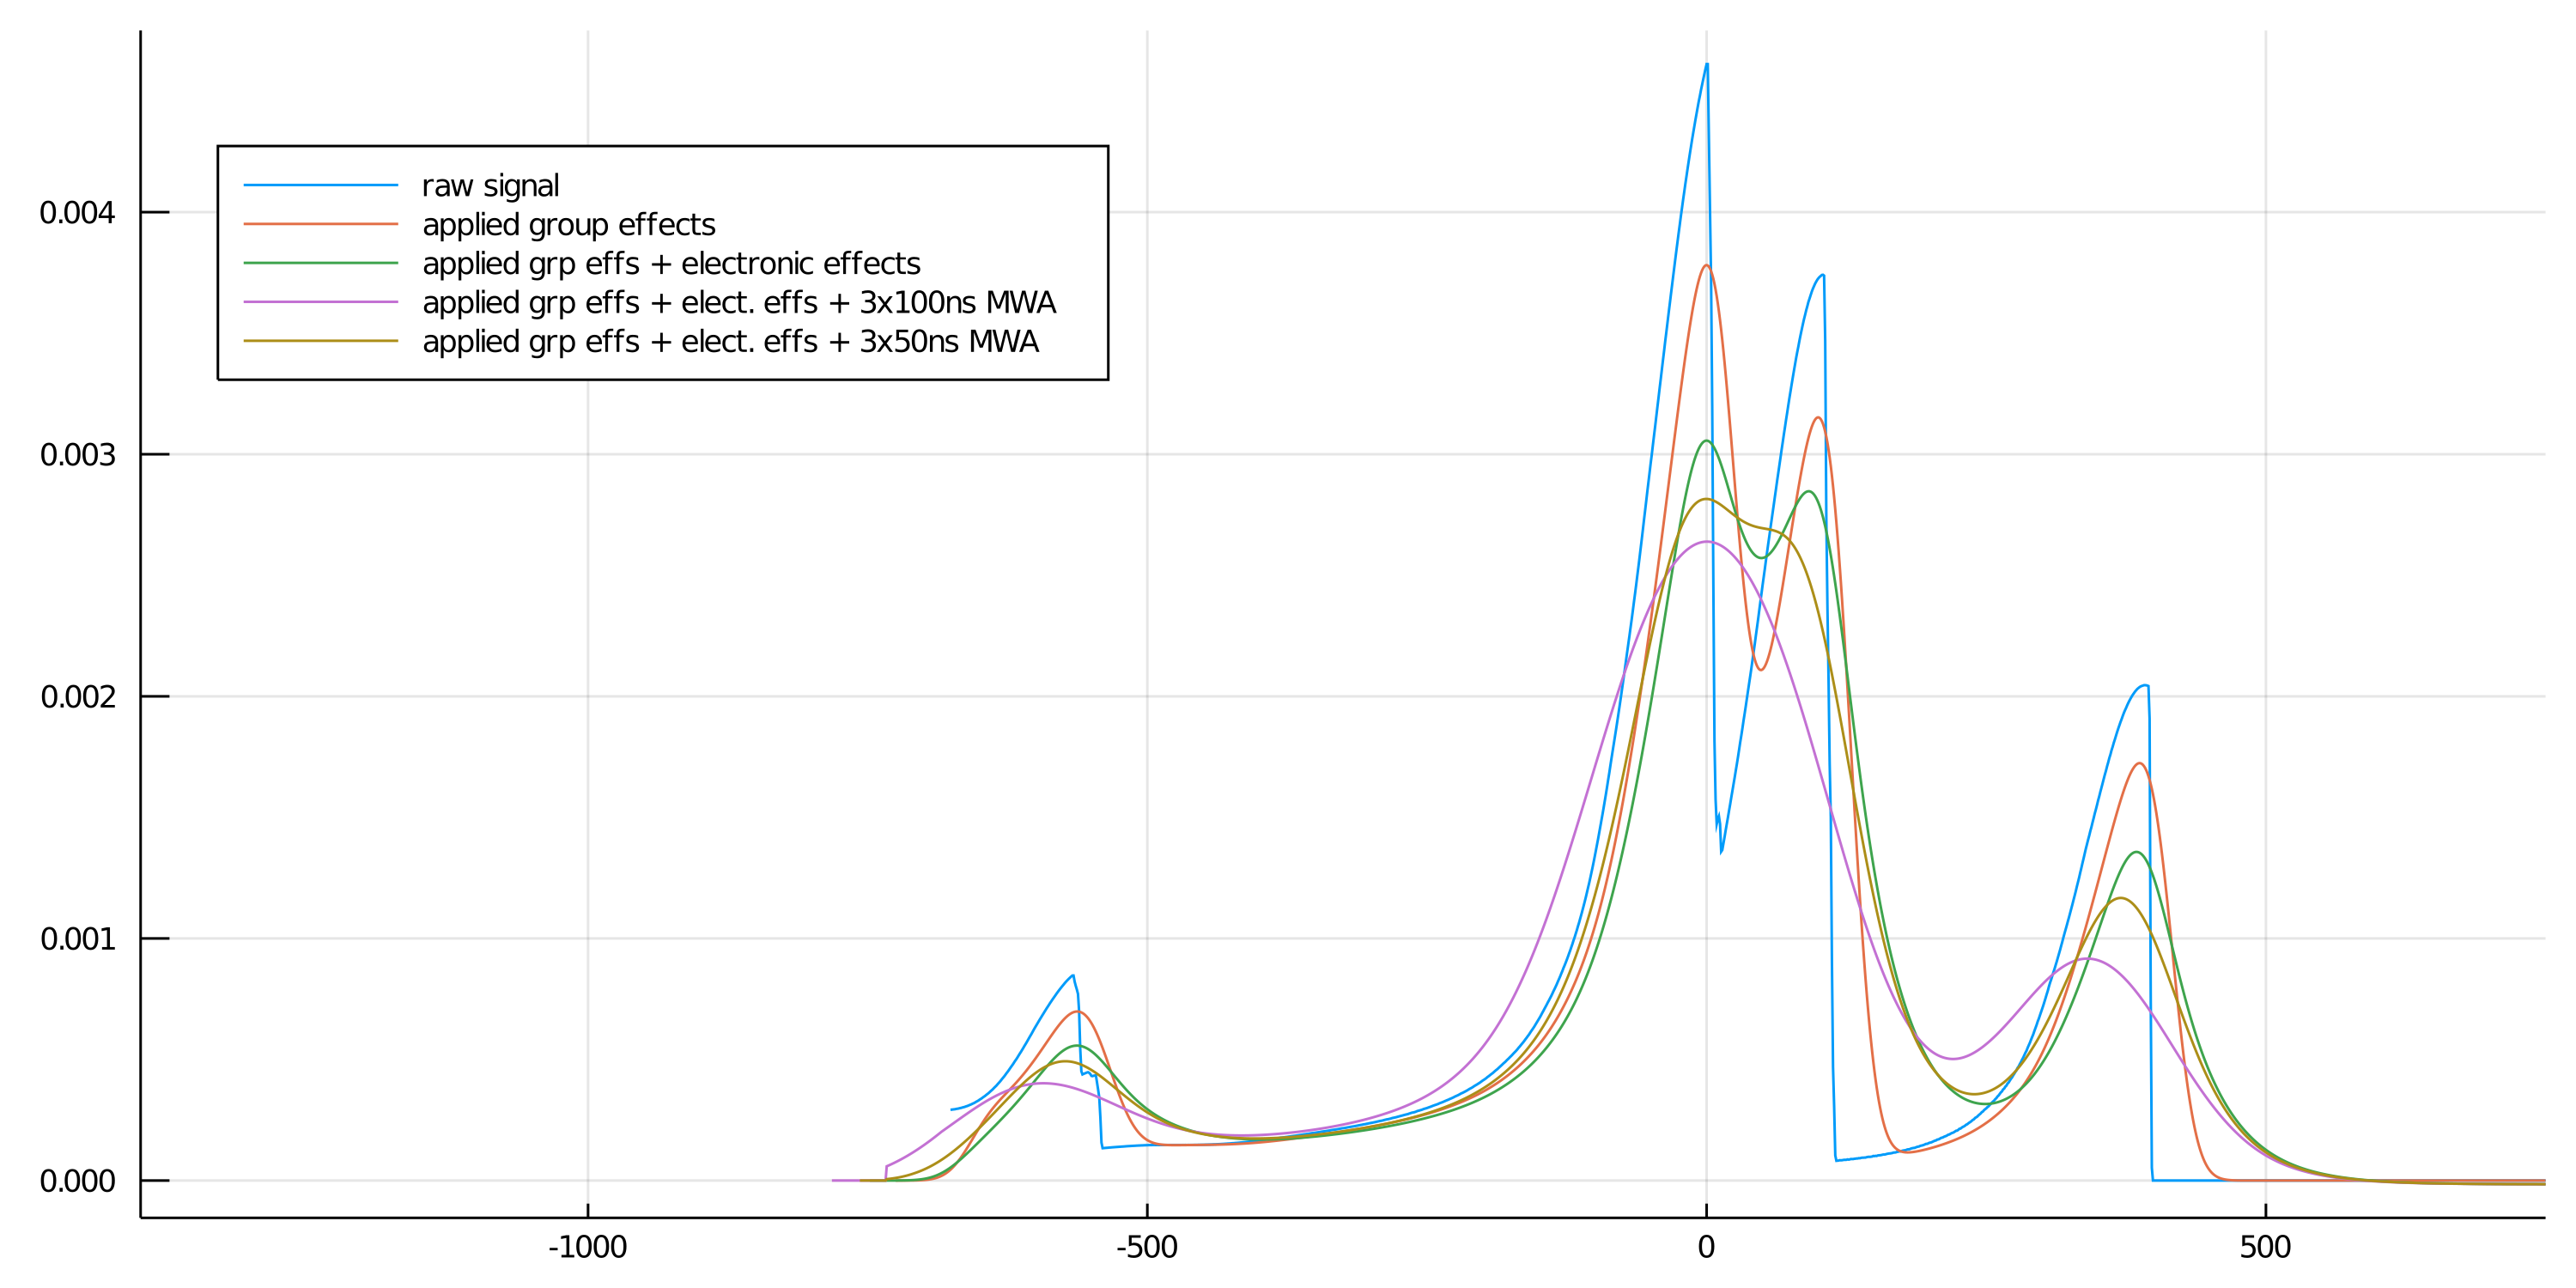

In [12]:
plot(xlims=(-1400, 750), legend=:topleft, fmt=:png, size=(1000, 500), dpi=300)
plot!(getxaxis(diff(l0), getA(l0)), diff(l0), label="raw signal")
plot!(getxaxis(diff(l1), getA(l1)), diff(l1), label="applied group effects")
plot!(getxaxis(diff(l2), getA(l2)), diff(l2), label="applied grp effs + electronic effects")
plot!(getxaxis(diff(l3), getA(l3)), diff(l3), label="applied grp effs + elect. effs + 3x100ns MWA")
plot!(getxaxis(diff(l4), getA(l4)), diff(l4), label="applied grp effs + elect. effs + 3x50ns MWA")

In [13]:
getσE(E) = sqrt(0.244593 + 0.00211413 * E) / (2 * √(2 * log(2)))

getσE (generic function with 1 method)

In [24]:
function getEandAweffs(event, signal, setup, elect_params, ns)
    E = energy(event)
    
    loc = location(first(hits(event)))
    outside_detector(setup, loc) && return get_noisy_energy(E, getσE(E)), missing
    
    δτ = with_group_effects!(setup, E, charge_cloud_size(E)) do stp
        getδτ(stp, loc)
    end
    
    s = apply_group_effects(signal, δτ, setup.step_time_out, true)
    s = apply_electronics(s; elect_params...)
    s = moving_average(s, ns, 3)

    s .*= E ./ maximum(s)

    return get_noisy_energy(E, getσE(E)), getA(s)
end

getEandAweffs (generic function with 1 method)

In [16]:
function map_events_signals(f::Function, event_path::AbstractString, signal_path::AbstractString, setup, args...)
    sgnls = load_signals(SignalDict, signal_path)
    return collect(
        (todetcoords!(event, setup); f(event, sgnls[event], setup, args...))
        for event in MaGe.loadstreaming(event_path) if !ismissing(sgnls[event])
    )
end

map_events_signals (generic function with 1 method)

In [27]:
Profile.clear()
@time EAs = map_events_signals(getEandAweffs, first(event_paths), first(signal_paths), setup, elect_params_GWD6022, 100)

  8.662901 seconds (691.49 k allocations: 285.320 MiB, 0.65% gc time)


479-element Array{Tuple{Float64,Float64},1}:
 (1685.9359538313995, 6.933525566026219)
 (2905.033101217672, 7.663174099999651)
 (1238.0721888737369, 3.295376191500054)
 (1236.4597663389145, 3.265626134733111)
 (1558.7024463789928, 6.483666397664479)
 (1770.9547266117806, 6.562400526348938)
 (1237.9019824898423, 5.0763427421680944)
 (1238.9228766179808, 4.483870569584155)
 (1237.9155953686407, 3.0373962005717203)
 (1239.7595401234953, 4.499528780613446)
 (1054.441471170913, 4.362269994788676)
 (1238.6053026395866, 4.1163499299234445)
 (1425.7733335234104, 5.964114267793093)
 ⋮
 (1312.0849713491245, 5.479384262840426)
 (1229.675497459437, 4.696352222485302)
 (1071.3238687676621, 4.467011439009298)
 (2319.535519554714, 9.61178362073315)
 (1238.8630969281594, 3.671823975319853)
 (1237.2044829872514, 5.120492716764602)
 (1238.1840882969461, 4.606009009624358)
 (2230.723560841725, 7.94876259525131)
 (2014.5687027485296, 3.636269463148551)
 (1237.3465668769566, 3.4686721733668264)
 (2016.15123

In [29]:
function map_events_signals(f::Function, event_paths::Vector{<:AbstractString}, signal_paths::Vector{<:AbstractString}, setup, args...)
    return vcat(map(zip(event_paths, signal_paths)) do (epath, spath)
        map_events_signals(f, epath, spath, setup, args...)
    end...)
end

map_events_signals (generic function with 2 methods)

In [34]:
Profile.clear()
@profile map_events_signals(getEandAweffs, event_paths[1:5], signal_paths[1:5], setup, elect_params_GWD6022, 100)
Profile.print(mincount=500)

Overhead ╎ [+additional indent] Count File:Line; Function
     ╎11936 @Base/task.jl:356; (::IJulia.var"#15#18")()
     ╎ 11936 ...ia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
     ╎  11936 @Base/essentials.jl:709; invokelatest
     ╎   11936 @Base/essentials.jl:710; #invokelatest#1
     ╎    11936 ...xecute_request.jl:86; execute_request(::ZMQ.Socket...
     ╎     11936 ...xecute_request.jl:27; execute_code(::String, ::St...
     ╎    ╎ 11936 @Base/loading.jl:1091; include_string(::Function...
     ╎    ╎  11936 In[29]:2; map_events_signals(::Functi...
     ╎    ╎   11936 ...bstractarray.jl:2188; map(::Function, ::Base.I...
     ╎    ╎    11936 @Base/array.jl:686; collect(::Base.Generator...
     ╎    ╎     11936 @Base/generator.jl:47; iterate
     ╎    ╎    ╎ 11936 In[29]:3; #29
     ╎    ╎    ╎  11921 In[16]:3; map_events_signals(::Fun...
     ╎    ╎    ╎   11920 @Base/array.jl:684; collect(::Base.Generat...
     ╎    ╎    ╎    11892 @Base/array.jl:751; grow_to!(::Array{Tupl...
   